# Etude de l’évolution de la température dans une ville
*ARE DYNAMIC - 2024*

## Préambule
 L'urbanisation croissante des villes à travers le monde a un impact significatif sur l'environnement local, en particulier sur les conditions climatiques et la qualité de vie des habitants. L'effet d'îlot de chaleur urbain est un phénomène bien connu où les zones urbaines ont tendance à être plus chaudes que les zones rurales environnantes. Ce phénomène est principalement dû à l'absorption et à la rétention de la chaleur par les matériaux de construction et les surfaces asphaltées, ainsi qu'à la réduction de la végétation qui pourrait autrement fournir de l'ombre et refroidir l'air par évapotranspiration.
 Le changement climatique global amplifie cet effet, rendant les épisodes de chaleur extrême plus fréquents et plus intenses, ce qui a des conséquences directes sur la santé publique, la consommation d'énergie pour le refroidissement et même la biodiversité locale.

 Dans ce contexte, il est crucial de mieux comprendre les mécanismes qui influencent la température dans les villes pour développer des stratégies d'adaptation efficaces. Ce projet vise à étudier l'évolution de la température dans une ville en prenant en compte les principaux facteurs qui influencent les conditions climatiques urbaines, notamment l'urbanisation, la végétation . En combinant la modélisation numérique et l'analyse des données, nous cherchons à répondre à la question de savoir comment l'urbanisation et la végétation influencent l'évolution de la température dans une ville et comment ces connaissances peuvent être utilisées pour atténuer l'effet d'îlot de chaleur urbain et améliorer la qualité de vie en milieu urbain.
 Ce projet présente donc un intérêt significatif non seulement pour les chercheurs et les urbanistes, mais aussi pour les décideurs politiques, les urbanistes et les habitants des villes qui sont directement touchés par les effets de l'urbanisation sur le climat local


## Thème 
 L'impact de l'urbanisation et de la végétation sur la température locale.

## Problématique 
 Comment l'urbanisation et la végétation influencent-elles l'évolution de la température dans une ville ?

## Hypothèse principale 
 L'urbanisation conduit à une augmentation de la température locale en raison de l'effet d'îlot de chaleur urbain, tandis que la végétation peut atténuer cette augmentation en améliorant la régulation thermique.

## Hypothèses secondaires 
 Les zones plus urbanisées présentent une plus grande augmentation de température par rapport aux zones moins urbanisées.
 Une augmentation de la couverture végétale dans la ville peut réduire l'effet d'îlot de chaleur urbain.

## Objectif 
 Étudier l'évolution de la température dans une ville en tenant compte de l'urbanisation et de la couverture végétale.

## Critère(s) d’évaluation 
 Variations de la température au fil du temps dans différents secteurs de la ville.
 Comparaison des températures entre les zones urbanisées et les zones avec couverture végétale.
 Identification des zones à risque élevé d'îlot de chaleur urbain et des zones où la végétation est efficace pour atténuer la chaleur.


 Ces éléments fournissent un cadre pour mener une étude approfondie sur l'évolution de la température dans une ville, en prenant en compte les effets de l'urbanisation et de la végétation. La modélisation numérique peut être utilisée comme outil pour répondre à cette problématique et vérifier les hypothèses.

# Développement : 

#  Première partie: Etude du modèle initiale

### Objectifs :

 Pour modéliser l'évolution de la température dans une ville, nous allons commencer par créer un modèle simplifié d'une ville . Nous allons définir des paramètres simples pour calculer la température à chaque position de la ville. Les formules et les paramètres seront basés sur les principes de base de la diffusion thermique, du bilan radiatif et de  l'effet d'îlot de chaleur urbain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

initial_temperature=initial_temperature_2=33



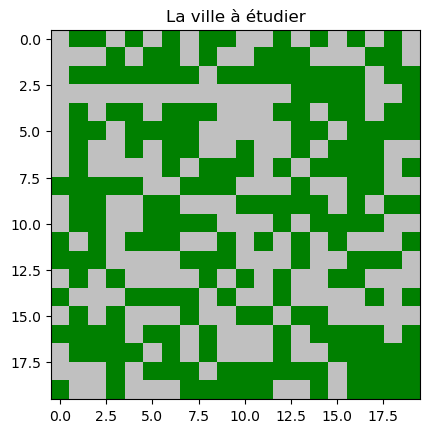

In [2]:
# Fonction pour générer la ville
def generate_world():
    world = []

    # Générer un monde rempli de valeurs aléatoires entre 0 et 1
    for i in range(20):
        row = []
        for j in range(20):
            # Attribuez 0 pour le vert (forêt) et 10 pour l'argent (industriel)
            row.append(np.random.choice([0, 10]))
        world.append(row)

    return world

# Générer la ville
world = generate_world()

# Convertissez la matrice en un tableau numpy pour une manipulation plus facile
world_np = np.array(world)

# Créez une palette de couleurs avec du vert et de l'argent
cmap = plt.cm.colors.ListedColormap(['green', 'silver'])

# Afficher l'image de la matrice avec la palette de couleurs personnalisée
plt.imshow(world_np, cmap=cmap, interpolation='nearest')
plt.title('La ville à étudier')  # Utilisation d'une chaîne Unicode pour le titre
#plt.colorbar(label='Deux types de zones.')
plt.show()


### 2 Definir les coordonées de positions

In [3]:
from tabulate import tabulate

# Définir les coordonnées de chaque case pour les zones vertes et argentées
green_coordinates = []
silver_coordinates = []

for i in range(world_np.shape[0]):
    for j in range(world_np.shape[1]):
        if world_np[i, j] == 0:  # Zones vertes
            green_coordinates.append((i, j))
        else:  # Zones argentées
            silver_coordinates.append((i, j))

# Organisez les coordonnées dans un format de tableau
table_data = []
max_len = max(len(green_coordinates), len(silver_coordinates))

for i in range(max_len):
    green_coord = green_coordinates[i] if i < len(green_coordinates) else ''
    silver_coord = silver_coordinates[i] if i < len(silver_coordinates) else ''
    table_data.append([green_coord, silver_coord])

# Afficher les coordonnées sous forme de tableau
print(tabulate(table_data, headers=["Coordonnées de la zone verte", "Coordonnées de la zone industrielle"]))

Coordonnées de la zone verte    Coordonnées de la zone industrielle
------------------------------  -------------------------------------
(0, 1)                          (0, 0)
(0, 2)                          (0, 3)
(0, 4)                          (0, 5)
(0, 6)                          (0, 7)
(0, 8)                          (0, 10)
(0, 9)                          (0, 11)
(0, 12)                         (0, 13)
(0, 14)                         (0, 15)
(0, 16)                         (0, 17)
(0, 18)                         (0, 19)
(1, 3)                          (1, 0)
(1, 5)                          (1, 1)
(1, 6)                          (1, 2)
(1, 8)                          (1, 4)
(1, 11)                         (1, 7)
(1, 12)                         (1, 9)
(1, 13)                         (1, 10)
(1, 17)                         (1, 14)
(1, 18)                         (1, 15)
(2, 1)                          (1, 16)
(2, 2)                          (1, 19)
(2, 3)                          

 Cette modélisation initiale nous permet de comprendre comment la température évolue dans une ville simple en utilisant les paramètres et les formules de base. Dans les sections suivantes, nous allons affiner notre modèle et étudier l'impact de ces facteurs sur la température urbaine.
 
 
### 3 Définir la fonction generate_heat_amount_per_hour qui représente la variation de l'ensoleillement tout au long d'une journée .

**Impotance:** Cette fonction est basée sur des modèles météorologiques typiques et suppose que la chaleur suit un modèle sinusoïdal au cours de la journée.

La courbe sinusoïdale est générée à l'aide de la formule :

* amplitude : Cela représente l'amplitude de la courbe sinus, contrôlant la plage de variation de l'ensoleillement.
sin
⁡
* sin : C'est la fonction sinus, qui renvoie le sinus de l'angle fourni.
* 𝜋/12  : Ce terme ajuste la période de la fonction sinus pour correspondre à une journée de 24 heures. Comme la période de la fonction sinus est  2𝜋, diviser par 12 la comprime pour qu'elle s'adapte dans 24 heures.

* (heure−heure_pic): Ce terme ajuste la phase de la courbe sinus pour déterminer quand le pic se produit.
* décalage: Cela ajoute un décalage à la courbe sinus pour s'assurer que l'ensoleillement minimale est supérieure à zéro.

$$ La-variation-de-l'ensoleillement = Amplitude × sin(𝜋/12 × (heure--heure-de-point))+ compense-quantité-de-chaleur $$ 



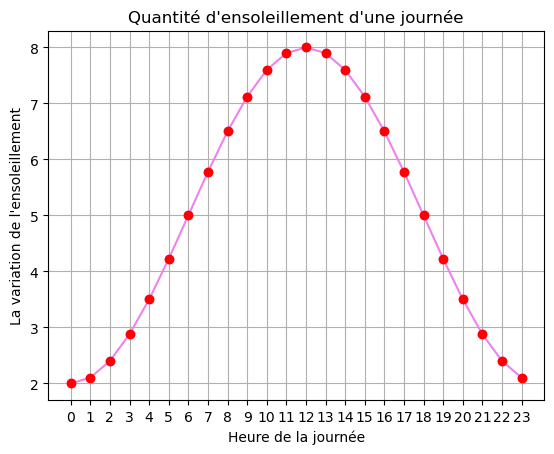

In [4]:
import numpy as np
import matplotlib.pyplot as plt



def generate_heat_amount_per_hour():
    """
    Génère une courbe sinusoïdale pour modéliser la variation de quantité d'ensoleillement tout au long de la journée.
    Paramètres :
    - heure_pic : Heure du pic de chaleur (en général, au milieu de la journée)
    - amplitude : Amplitude de la courbe sinusoïdale (contrôle la plage de variation de la quantité de chaleur)
    - décalage : Décalage pour garantir une quantité de chaleur minimale
    
    Retourne :
    - Une liste de la quantité de chaleur pour chaque heure de la journée (24 heures)
    """
    hours = np.arange(24)
    peak_hour = 6    # Heure du pic de chaleur
    amplitude = 3    # Amplitude de la courbe sinusoïdale
    offset = 5       # Décalage pour garantir une quantité de chaleur minimale
    heat_amount_per_hour = amplitude * np.sin((np.pi / 12) * (hours - peak_hour)) + offset
    heat_amount_per_hour[heat_amount_per_hour < 0] = 0  # Vérifie que la quantité de chaleur ne descend pas en dessous de zéro
    
    return heat_amount_per_hour

# Générer une quantité de chaleur par heure par jour
heat_amount_per_hour = generate_heat_amount_per_hour()


# Afficher la quantité de chaleur tout au long de la journée
plt.plot(range(24), heat_amount_per_hour, marker='o', color='violet')
plt.plot(range(24), heat_amount_per_hour, marker='o', linestyle='', color='red')


plt.title("Quantité d'ensoleillement d'une journée")  # Utilisation d'une chaîne Unicode pour le titre
plt.xlabel('Heure de la journée')
plt.ylabel("La variation de l'ensoleillement")
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()


Cette modélisation dynamique nous permet d'étudier l'évolution de la température dans la ville  offrant ainsi une représentation plus réaliste de la dynamique thermique urbaine


##### Explication de la formule : 

On choisi de utilisée  cette formule pour générer la courbe sinusoïdale de la quantité d'ensoleillement par heure dans une journée est basée sur la fonction sinus. 
La fonction sinus est une fonction trigonométrique qui représente la relation entre l'angle d'un triangle rectangle et le rapport de la longueur du côté opposé à l'angle à la longueur de l'hypoténuse.




#### Source:
https://mrurbanc.weebly.com/uploads/4/4/2/6/44267585/trig_graphs_-_applications_answers__1_per_page__-_updated_2017.pdf


https://www.researchgate.net/figure/Thermal-response-on-a-sinusoidal-heat-transfer-through-a-wall-26_fig2_340016673


https://niwa.co.nz/education-and-training/schools/resources/climate/modelling


https://homework.study.com/explanation/outside-temperature-over-a-day-can-be-modeled-as-a-sinusoidal-function-suppose-you-know-the-temperature-varies-between-54-and-76-degrees-during-the-day-and-the-average-daily-temperature-first-occurs-at-9-am-how-many-hours-after-midnight-to-two-decimal.html#:~:text=The%20temperature%20increases%20or%20decreases,equation%20gives%20the%20unknown%20variable.



### 4 Définir la température initiale, le coefficient d'absorption et la quantité d'ensoleillement pour chaque zone. 

 Dans cette partie de la modélisation, nous continue à compléter notre modèle qui va nous permettra d'étudier l'évolution de la température dans la ville en prenant en compte le coefficient d'absorption.
* D'après les recherches, les zones vert sont avec le coefficient d'absorption entre 0.1 à 0.3.
* Et pour les zones industrielle sont avec le coefficient d'absorption entre 0.4 à 0.6.

In [5]:
# Définir la température initiale, le coefficient d'absorption et  la quantité d'ensoleillement pour chaque zone
#initial_temperature = 30  # Température initiale

# Coefficient d'absorption aléatoire pour chaque zone
absorption_coefficient = np.where(world_np == 0, np.random.uniform(0.1, 0.3), np.random.uniform(0.4, 0.6))

print("Température initiale:")
print(initial_temperature)
print("\nCoefficient d'absorption:")
print(absorption_coefficient)
print("\nQuantité de chaleur:")
print(heat_amount_per_hour)

Température initiale:
33

Coefficient d'absorption:
[[0.41861493 0.11803357 0.11803357 0.41861493 0.11803357 0.41861493
  0.11803357 0.41861493 0.11803357 0.11803357 0.41861493 0.41861493
  0.11803357 0.41861493 0.11803357 0.41861493 0.11803357 0.41861493
  0.11803357 0.41861493]
 [0.41861493 0.41861493 0.41861493 0.11803357 0.41861493 0.11803357
  0.11803357 0.41861493 0.11803357 0.41861493 0.41861493 0.11803357
  0.11803357 0.11803357 0.41861493 0.41861493 0.41861493 0.11803357
  0.11803357 0.41861493]
 [0.41861493 0.11803357 0.11803357 0.11803357 0.11803357 0.11803357
  0.11803357 0.11803357 0.41861493 0.11803357 0.11803357 0.11803357
  0.11803357 0.11803357 0.11803357 0.11803357 0.11803357 0.41861493
  0.11803357 0.11803357]
 [0.41861493 0.41861493 0.41861493 0.41861493 0.41861493 0.41861493
  0.41861493 0.41861493 0.41861493 0.41861493 0.41861493 0.41861493
  0.41861493 0.11803357 0.11803357 0.11803357 0.11803357 0.41861493
  0.41861493 0.11803357]
 [0.41861493 0.11803357 0.418614

### 5 Définir la fonction qui calcule le changement de température en fonction de la formule

D'aprés notre recherche on a utiliisé la formule pour trouver la temperature de chaque case:

* Coefficient de absoption== Abs
* La variation de l'ensoleillement= Ve


$$ Temperature = Temperature-initial + Abs *  Ve $$

In [6]:
def calculate_temperature_per_box(world_np, heat_amount_per_hour, initial_temperature, absorption_coefficient):
    # Initialiser un tableau vide pour stocker les températures pour chaque case
    temperatures = np.zeros_like(world_np, dtype=float)

    # Parcourez chaque case de la ville
    for i in range(world_np.shape[0]):
        for j in range(world_np.shape[1]):
           # Obtenez la quantité de chaleur pour l'heure en cours en fonction de les coordonnes de cases
            heat_amount = heat_amount_per_hour[j]

            # Calculer la température de la case actuelle
            temperatures[i, j] = initial_temperature + absorption_coefficient[i, j] * heat_amount

    return temperatures
# Calculer la température de chaque boîte dans la ville
# Génère une quantité de chaleur par heure pour une journée normale (en supposant qu'elle soit déjà générée)
heat_amount_per_hour = generate_heat_amount_per_hour()

# Calculer les températures pour chaque boîte dans le monde
temperatures = calculate_temperature_per_box(world_np, heat_amount_per_hour, initial_temperature, absorption_coefficient)

# Imprimez ou utilisez les températures selon vos besoins
print("Temperatures for each box:")
print(temperatures)


Temperatures for each box:
[[33.83722985 33.24813284 33.28350765 34.20505827 33.41311751 34.76803809
  33.59016787 35.41811118 33.76721823 33.84055489 36.18066812 36.30612754
  33.94426859 36.30612754 33.89682809 35.981091   33.76721823 35.41811118
  33.59016787 34.76803809]
 [33.83722985 33.88002173 34.00548115 33.33978085 34.46515224 33.49851986
  33.59016787 35.41811118 33.76721823 35.981091   36.18066812 33.9322029
  33.94426859 33.9322029  36.18066812 35.981091   35.72099703 33.68181588
  33.59016787 34.76803809]
 [33.83722985 33.24813284 33.28350765 33.33978085 33.41311751 33.49851986
  33.59016787 33.68181588 35.72099703 33.84055489 33.89682809 33.9322029
  33.94426859 33.9322029  33.89682809 33.84055489 33.76721823 35.41811118
  33.59016787 33.49851986]
 [33.83722985 33.88002173 34.00548115 34.20505827 34.46515224 34.76803809
  35.09307464 35.41811118 35.72099703 35.981091   36.18066812 36.30612754
  36.34891942 33.9322029  33.89682809 33.84055489 33.76721823 35.41811118
  35.0

### 6 En fonction des températures reçues, nous créons un nouveau plan dans lequel nous présentons l'augmentation attendue de la température dans la ville.

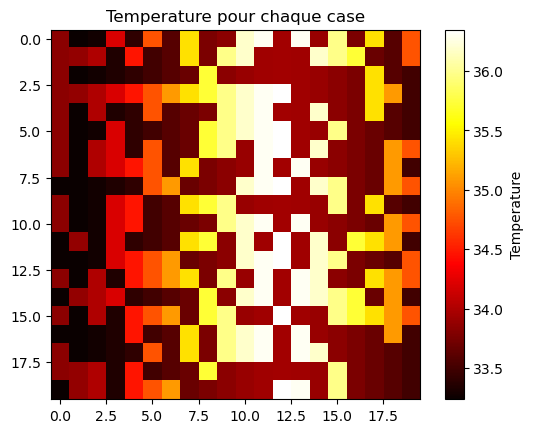

In [7]:
# Create a colormap coolwarm
cmap = plt.cm.hot


#YlOrRd
#plasma
#OrRd
#hot

# Afficher les températures sur un plan avec la palette de couleurs coolwarm
plt.imshow(temperatures, cmap=cmap, interpolation='nearest')
plt.title('Temperature pour chaque case')
plt.colorbar(label='Temperature')
plt.show()

### 7 À partir des données obtenues, nous trouvons la zone avec la température la plus élevée.

In [8]:
import numpy as np

def find_highest_temperature_coordinates(temperatures):
    # Trouver les indices de la température maximale dans le tableau des températures
    max_index = np.argmax(temperatures)
    
    #Convertir l'index 1D en coordonnées 2D
    max_coord = np.unravel_index(max_index, temperatures.shape)
    
    return max_coord

# Example usage:
max_temperature_coord = find_highest_temperature_coordinates(temperatures)
print("Coordonnées de la zone avec la température la plus élevée:", max_temperature_coord)


Coordonnées de la zone avec la température la plus élevée: (3, 12)


### 8 Tracer l'évolution de la température pour un lieu précis (coordonnées)

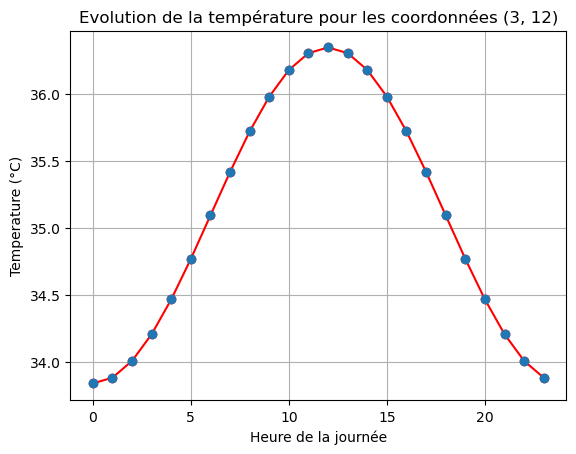

In [9]:
import matplotlib.pyplot as plt

def plot_temperature_evolution_for_coordinates(heat_amount_per_hour, temperatures, coordinates):
    """Plot the temperature evolution for a specific location (coordinates) throughout the day.
    
    Parameters:
    - heat_amount_per_hour (np.array): Array containing heat amount values for each hour of the day.
    - temperatures (np.array): Array containing temperature values for each box in the city.
    - coordinates (tuple): Coordinates (row, column) of the location to plot.
    """
    row, col = coordinates
    
    # Initialize an empty list to store the temperature evolution
    temperature_evolution = []
    
    # Calculate the temperature evolution throughout the day for the specified coordinates
    for hour in range(24):
        heat_amount = heat_amount_per_hour[hour]
        temperature = initial_temperature + absorption_coefficient[row, col] * heat_amount
        temperature_evolution.append(temperature)
    
    # Plot the evolution of temperature for the selected coordinates
    plt.plot(range(24), temperature_evolution, marker='o', color='red')
    plt.plot(range(24), temperature_evolution, marker='o', linestyle='')
    plt.title('Evolution de la température pour les coordonnées {}'.format(coordinates))
    
    plt.xlabel('Heure de la journée')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_temperature_evolution_for_coordinates(heat_amount_per_hour, temperatures, max_temperature_coord)


 Ce modèle a montré une augmentation générale de la température dans la ville, avec des valeurs plus élevées près du centre de la ville en raison de l'effet d'îlot de chaleur urbain.

Or l'intégration de la végétation a eu un effet significatif sur la réduction de la température dans la ville. La végétation a aidé à absorber une partie du rayonnement solaire, réduisant ainsi le bilan radiatif positif et la température globale dans la ville. De plus, la végétation a également amélioré l'efficacité de la convection et de la circulation de l'air, contribuant à une meilleure régulation thermique.



# Deuxième partie

### 1 Étudier la libération de chaleur d'une ville:

* **Effet d'îlot de chaleur urbain :** Les villes ont tendance à être plus chaudes que les zones environnantes en raison de l'accumulation de chaleur générée par les activités humaines, les bâtiments en béton et en asphalte qui absorbent et retiennent la chaleur, et la diminution de la végétation. Comprendre la libération de chaleur dans différentes zones urbaines permet de quantifier et de modéliser l'effet d'îlot de chaleur urbain.
* **Prédiction des températures locales** : En tenant compte de la libération de chaleur dans différents secteurs d'une ville, les modèles météorologiques peuvent mieux prédire les températures locales. Cela est particulièrement important pour les services météorologiques qui fournissent des prévisions météorologiques précises pour les habitants des zones urbaines.

### Références
-[1] Îlot de chaleur urbain, [Wikipedia]
(https://fr.wikipedia.org/wiki/%C3%8Elot_de_chaleur_urbain), 


 D'après nos recherches, nous n'avons pas constaté qu'il y ait une heure de pointe de dégagement de chaleur, mais sur la base de la situation actuelle, nous voyons que le moment où nous avons le début de la perte de chaleur se situe dans la soirée, principalement vers 19h00.
 
 Ceci est également évalué sur la base du moment où il n'y a pas de soleil, nous n'avons donc pas de source naturelle de chaleur, ainsi que du fait que les activités industrielles ne sont plus actives la nuit.

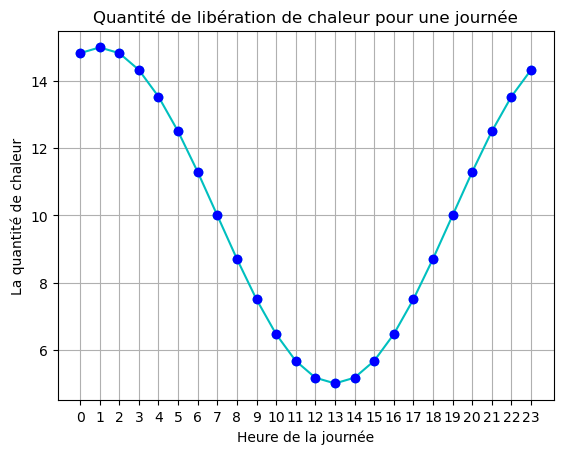

In [10]:
# Fonction pour générer la quantité de chaleur libérée pour une journée
def generate_heat_liberation(day_hours):
    """
    Génère la quantité de chaleur libérée pour une journée.
    """
    peak_hour = 19   # Heure de pointe
    amplitude = 5    # Amplitude de la courbe sinusoïdale
    offset = 10      # Compensation pour assurer une libération de chaleur positive
    
    # Générer une quantité de libération de chaleur pour chaque heure de la journée
    
    heat_liberation[heat_liberation < 0] = 0  # Vérifie que la libération de chaleur ne descend pas en dessous de zéro
    
    return heat_liberation

# Générer des heures de la journée (0 à 23)
day_hours = np.arange(24)

# Générer une quantité de chaleur libérée pendant une journée
heat_liberation = generate_heat_liberation(day_hours)

# Définir la température initiale, le coefficient d'absorption et la quantité de chaleur pour chaque zone
initial_temperature = 30  # Température initiale

# Afficher la quantité de libération de chaleur pour une journée
plt.plot(day_hours, heat_liberation, marker='o', color='c')
plt.plot(day_hours, heat_liberation, marker='o', linestyle='',color='blue')

plt.title('Quantité de libération de chaleur pour une journée')
plt.xlabel('Heure de la journée')
plt.ylabel('La quantité de chaleur')
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()


 A travers le graphique ci-dessus nous avons vu que la quantité de chaleur libérée dans une journée se fait en fonction de l'heure et du début de la perte de chaleur.

**Le coefficient de réflexion**. 
Ce terme désigne la proportion de lumière ou de chaleur réfléchie par une surface par rapport à celle qui est absorbée. Alors que le coefficient d'absorption mesure la capacité d'une surface à absorber la lumière ou la chaleur incidente, le coefficient de réflexion indique la proportion de cette énergie qui est renvoyée ou réfléchie.

Les mesures des coefficients d'absorption et de réflexion pour les zones vertes (forêts) et les zones urbaines peuvent varier en fonction de plusieurs facteurs, tels que la végétation, les matériaux de construction, la géométrie urbaine, etc. D'aprés https://www.nrel.gov/docs/fy17osti/66763.pdf, voici des valeurs typiques pour ces coefficients :

* Zones Vertes (Forêts) :
Coefficient de Réflexion : En conséquence, le coefficient de réflexion serait plus bas, par exemple autour de 0,1 à 0,2, indiquant que seule une petite fraction de l'énergie incidente est réfléchie par la végétation.
* Zones Industrielle :
Coefficient de Réflexion : le coefficient de réflexion serait plus élevé que dans les zones industrielles, par exemple autour de 0,4 à 0,8, indiquant une plus grande proportion d'énergie réfléchie par les surfaces industrielle.

### 2 Définir la température initiale, le coefficient de réflexion et la quantité de chaleur libérée pour chaque zone

In [11]:
# Définir la température initiale, le coefficient de réflexion et la quantité de chaleur pour chaque zone
#initial_temperature_2 =  30  # Température initiale
reflexion_coefficient = np.where(world_np == 0, np.random.uniform(0.1, 0.2), np.random.uniform(0.4, 0.8))  
# Coefficient d'absorption aléatoire pour chaque zone
current_time = datetime.datetime.now()


print("Température initiale:")
print(initial_temperature_2)
print("\nCoefficient de réflexion:")
print(reflexion_coefficient)
print("\nQuantité de libération de chaleur:")
print(heat_liberation)


Température initiale:
33

Coefficient de réflexion:
[[0.54980586 0.12746293 0.12746293 0.54980586 0.12746293 0.54980586
  0.12746293 0.54980586 0.12746293 0.12746293 0.54980586 0.54980586
  0.12746293 0.54980586 0.12746293 0.54980586 0.12746293 0.54980586
  0.12746293 0.54980586]
 [0.54980586 0.54980586 0.54980586 0.12746293 0.54980586 0.12746293
  0.12746293 0.54980586 0.12746293 0.54980586 0.54980586 0.12746293
  0.12746293 0.12746293 0.54980586 0.54980586 0.54980586 0.12746293
  0.12746293 0.54980586]
 [0.54980586 0.12746293 0.12746293 0.12746293 0.12746293 0.12746293
  0.12746293 0.12746293 0.54980586 0.12746293 0.12746293 0.12746293
  0.12746293 0.12746293 0.12746293 0.12746293 0.12746293 0.54980586
  0.12746293 0.12746293]
 [0.54980586 0.54980586 0.54980586 0.54980586 0.54980586 0.54980586
  0.54980586 0.54980586 0.54980586 0.54980586 0.54980586 0.54980586
  0.54980586 0.12746293 0.12746293 0.12746293 0.12746293 0.54980586
  0.54980586 0.12746293]
 [0.54980586 0.12746293 0.549805

### 3 Définir la fonction qui calcule le changement de température en fonction de la formule

D'aprés notre recherche on a utiliisé la formule pour trouver la temperature de chaque case:

* Temperature-initial= Ti

* Quantité de libération de chaleur == Qlch

* Coefficient-de-réflexion== Cr

$$ Temperature = Ti - Cr  * Qlch  $$

In [12]:
def calculate_temperature_2(world_np, heat_liberation, initial_temperature_2, reflexion_coefficient):
    # Initialiser un tableau vide pour stocker les températures pour chaque case
    temperatures = np.zeros_like(world_np, dtype=float)

    # Parcourez chaque case de la ville
    for i in range(world_np.shape[0]):
        for j in range(world_np.shape[1]):
            # Obtenez la quantité de chaleur pour l'heure en cours en fonction des coordonnées de cases
            heat_lib = heat_liberation[j]

            # Calculer la température de la case actuelle
            temperatures[i, j] = initial_temperature_2 - reflexion_coefficient[i, j] * heat_lib

    return temperatures
# Génère une quantité de chaleur par heure pour une journée normale (en supposant qu'elle soit déjà générée)
heat_liberation = generate_heat_liberation(day_hours)

# Calculer les températures pour chaque boîte dans le monde
temperatures_2= calculate_temperature_2(world_np, heat_liberation, initial_temperature_2, reflexion_coefficient)

# Imprimez ou utilisez les températures selon vos besoins
print("Températures pour chaque case après chaleur libérée:")
print(temperatures_2)

Températures pour chaque case après chaleur libérée:
[[24.84658307 31.08805608 31.10977205 25.12121226 31.27472122 26.12742681
  31.56042155 27.50194145 31.89031989 32.04402804 29.44579869 29.88267064
  32.34096939 30.25097072 32.34096939 29.88267064 32.17602022 28.87645608
  31.89031989 27.50194145]
 [24.84658307 24.75291217 24.84658307 31.17344005 25.5580842  31.4067134
  31.56042155 27.50194145 31.89031989 28.87645608 29.44579869 32.27730139
  32.34096939 32.36268536 30.15729982 29.88267064 29.44579869 32.04402804
  31.89031989 27.50194145]
 [24.84658307 31.08805608 31.10977205 31.17344005 31.27472122 31.4067134
  31.56042155 31.72537072 28.21344258 32.04402804 32.17602022 32.27730139
  32.34096939 32.36268536 32.34096939 32.27730139 32.17602022 28.87645608
  31.89031989 31.72537072]
 [24.84658307 24.75291217 24.84658307 25.12121226 25.5580842  26.12742681
  26.79044031 27.50194145 28.21344258 28.87645608 29.44579869 29.88267064
  30.15729982 32.36268536 32.34096939 32.27730139 32.1

### 4 En fonction des températures reçues, nous créons un nouveau plan où nous présentons la baisse de température attendue dans la ville.

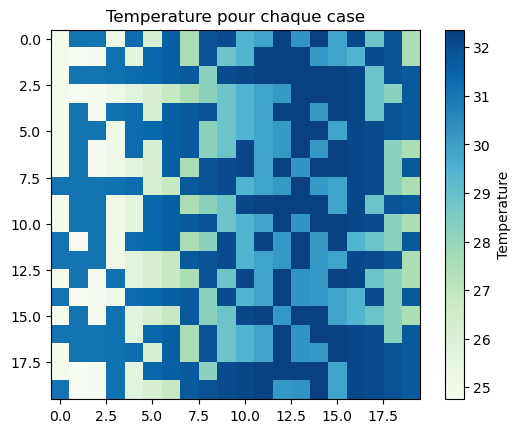

In [13]:
# Create a colormap coolwarm
cmap = plt.cm.GnBu


#YlOrRd
#plasma
#OrRd
#hot

# Afficher les températures sur un plan avec la palette de couleurs coolwarm
plt.imshow(temperatures_2, cmap=cmap, interpolation='nearest')
plt.title('Temperature pour chaque case')
plt.colorbar(label='Temperature')
plt.show()

### 5 Trouver les coordonnées de case avec la température la plus basse dans le tableau des températures.

In [14]:
import numpy as np

def find_lowest_temperature_coordinates(temperatures):
    """
    Find the coordinates with the lowest temperature in the temperatures array.
    
    Parameters:
    - temperatures (np.array): Array containing temperature values for each box in the city.
    
    Returns:
    - min_coord (tuple): Coordinates (row, column) with the lowest temperature.
    """
    # Find the indices of the minimum temperature in the temperatures array
    min_index = np.argmin(temperatures)
    
    # Convert the 1D index to 2D coordinates
    min_coord = np.unravel_index(min_index, temperatures.shape)
    
    return min_coord

# Example usage:
min_temperature_coord = find_lowest_temperature_coordinates(temperatures_2)
print("Coordonnées de la zone avec la température la plus basse:", min_temperature_coord)


Coordonnées de la zone avec la température la plus basse: (1, 1)


### 6 Présenter le changement de température pour une case/ zone qui présente la plus grande baisse de température au cours de la journée.

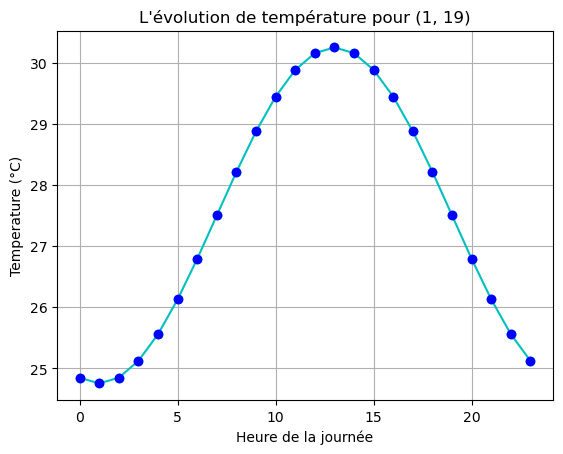

In [15]:
import matplotlib.pyplot as plt

def plot_temperature_evolution_for_box_2(heat_liberation, initial_temperature_2, reflexion_coefficient, coordinates):
    """
    Plot the temperature evolution for a specific box throughout the day.
    
    Parameters:
    - heat_liberation (np.array): Array containing heat liberation values for each hour of the day.
    - initial_temperature_2 (float): Initial temperature of the box.
    - reflexion_coefficient (np.array): Array containing reflection coefficients for each box in the city.
    - coordinates (tuple): Coordinates (row, column) of the box to plot.
    """
    row, col = coordinates
    
    # Initialize an empty list to store the temperature evolution
    temperature_evolution = []
    
    # Calculate the temperature evolution throughout the day for the specified box
    for hour in range(24):
        heat_lib = heat_liberation[hour]
        temperature = initial_temperature_2 - reflexion_coefficient[row, col] * heat_lib
        temperature_evolution.append(temperature)
    
    # Plot the evolution of temperature for the specified box
    plt.plot(range(24), temperature_evolution, marker='o', color='c')
    plt.plot(range(24), temperature_evolution, marker='o', linestyle='',color='blue')
    plt.title("L'évolution de température pour {}".format(coordinates))
    plt.xlabel('Heure de la journée')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()

# Example usage:
plot_temperature_evolution_for_box_2(heat_liberation, initial_temperature_2, reflexion_coefficient, (1, 19))



# Troisième partie: Comparaison des resultat

#### Conclusion Générale
L'intégration de la végétation dans notre modèle a montré son importance dans la régulation thermique urbaine. La végétation joue un rôle crucial dans la réduction de l'effet d'îlot de chaleur urbain en absorbant une partie du 
rayonnement solaire et en améliorant la convection et la circulation de l'air. 

Il est donc essentiel d'incorporer des espaces verts et de la végétation dans la planification urbaine pour atténuer les effets néfastes de la chaleur urbaine et améliorer le confort thermique des citoyens.


En conclusion, cette étude nous permet de mieux comprendre les mécanismes complexes qui influencent la température dans les villes et souligne l'importance de la végétation dans la régulation thermique urbaine. Des études supplémentaires peuvent être réalisées pour affiner le modèle et intégrer d'autres facteurs, tels que le relief et la densité de la ville, afin d'obtenir des résultats plus précis et fiables.


In [22]:
max_temperature_coord = find_highest_temperature_coordinates(temperatures)
print("Les coordnonnes d'une case  avec la température la plus élevée:", max_temperature_coord)
min_temperature_coord = find_lowest_temperature_coordinates(temperatures_2)
print("Les coordnonnes d'une case  avec la température la plus base:", min_temperature_coord)

Les coordnonnes d'une case  avec la température la plus élevée: (3, 12)
Les coordnonnes d'une case  avec la température la plus base: (1, 1)


### Comparaison des évolutions de température pour deux zones différentes.

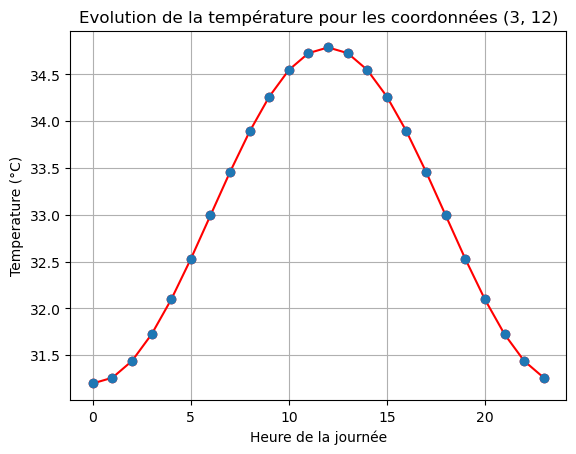

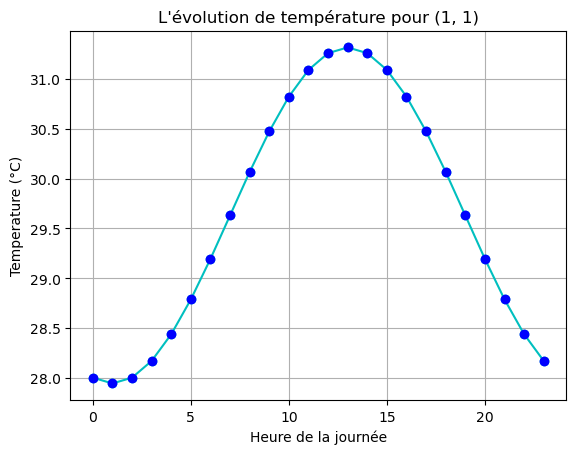

In [23]:
plot_temperature_evolution_for_coordinates(heat_amount_per_hour, temperatures,  max_temperature_coord)

plot_temperature_evolution_for_box_2(heat_liberation, initial_temperature_2, reflexion_coefficient, min_temperature_coord)

### L'évolution de température pour une zone .

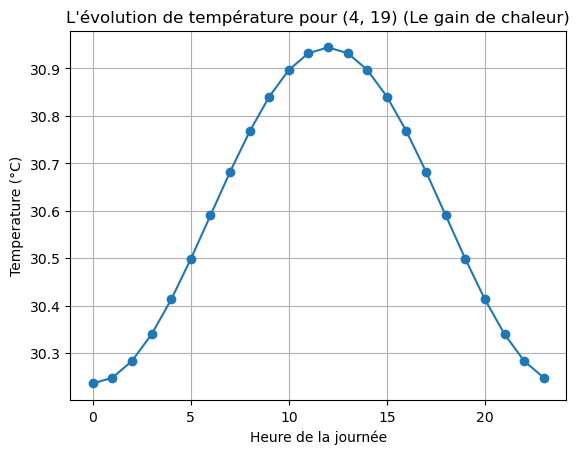

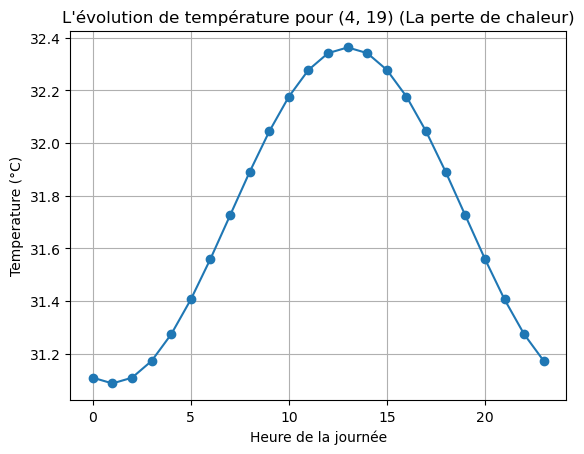

In [18]:
import matplotlib.pyplot as plt

def plot_temperature_evolution(heat_data, initial_temperature, absorption_or_reflexion_coefficient, coordinates, location_type):
    """
    Plot the temperature evolution for a specific location or box throughout the day.
    
    Parameters:
    - heat_data (np.array): Array containing either heat amount values or heat liberation values for each hour of the day.
    - initial_temperature (float): Initial temperature of the location or box.
    - absorption_or_reflexion_coefficient (np.array): Array containing either absorption coefficients or reflection coefficients for each location or box in the city.
    - coordinates (tuple): Coordinates (row, column) of the location or box to plot.
    - location_type (str): Indicates whether the plot is for a 'location' or a 'box'.
    """
    row, col = coordinates
    
    # Initialize an empty list to store the temperature evolution
    temperature_evolution = []
    
    # Calculate the temperature evolution throughout the day based on the location type
    for hour in range(24):
        if location_type == 'location':
            heat_amount = heat_data[hour]
            temperature = initial_temperature + absorption_or_reflexion_coefficient[row, col] * heat_amount
        elif location_type == 'box':
            heat_lib = heat_data[hour]
            temperature = initial_temperature - absorption_or_reflexion_coefficient[row, col] * heat_lib
        else:
            raise ValueError("Invalid location type. Please use 'location' or 'box'.")
        temperature_evolution.append(temperature)
    
    # Plot the evolution of temperature based on the location type
    plt.plot(range(24), temperature_evolution, marker='o')
    if location_type == 'location':
        plt.title("L'évolution de température pour {} (Le gain de chaleur)".format(coordinates))
    elif location_type == 'box':
        plt.title("L'évolution de température pour {} (La perte de chaleur)".format(coordinates))
    plt.xlabel('Heure de la journée')
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()

# Example usage:
# Plot temperature evolution for a specific location
plot_temperature_evolution(heat_amount_per_hour, initial_temperature, absorption_coefficient, (4, 19), 'location')

# Plot temperature evolution for a specific box
plot_temperature_evolution(heat_liberation, initial_temperature_2, reflexion_coefficient, (4, 19), 'box')


### Des évolutions de températures pour trois zones par rapport de temperature maximale et minimal pour chaque different temps.

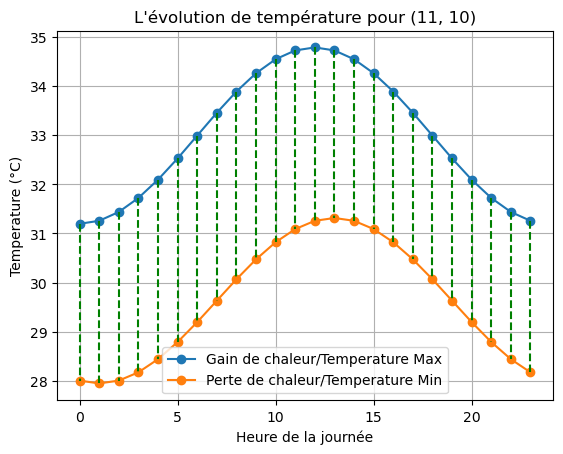

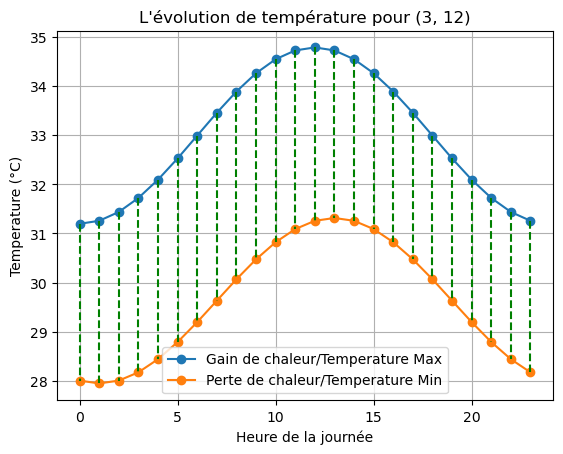

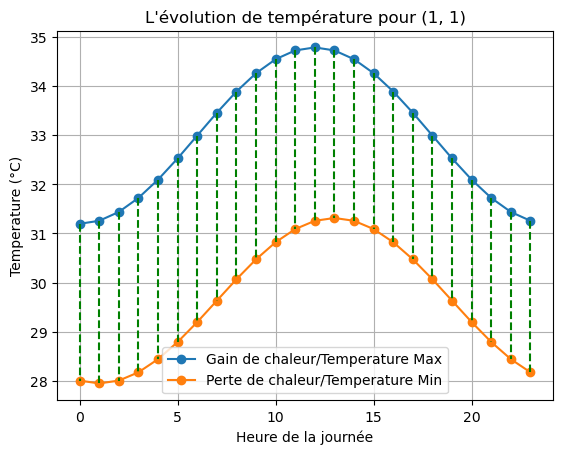

In [21]:
import matplotlib.pyplot as plt

def plot_temperature_evolution_2(heat_data_1, initial_temperature_1, absorption_or_reflexion_coefficient_1, heat_data_2, initial_temperature_2, absorption_or_reflexion_coefficient_2, coordinates):
    """
    Plot the temperature evolution for a specific location or box throughout the day.
    
    Parameters:
    - heat_data_1 (np.array): Array containing heat amount values or heat liberation values for each hour of the day for the first set of data.
    - initial_temperature_1 (float): Initial temperature of the location or box for the first set of data.
    - absorption_or_reflexion_coefficient_1 (np.array): Array containing either absorption coefficients or reflection coefficients for each location or box in the city for the first set of data.
    - heat_data_2 (np.array): Array containing heat amount values or heat liberation values for each hour of the day for the second set of data.
    - initial_temperature_2 (float): Initial temperature of the location or box for the second set of data.
    - absorption_or_reflexion_coefficient_2 (np.array): Array containing either absorption coefficients or reflection coefficients for each location or box in the city for the second set of data.
    - coordinates (tuple): Coordinates (row, column) of the location or box to plot.
    """
    row, col = coordinates
    
    # Initialize empty lists to store the temperature evolutions for both sets of data
    temperature_evolution_1 = []
    temperature_evolution_2 = []
    
    # Calculate the temperature evolution throughout the day for both sets of data
    for hour in range(24):
        heat_amount_1 = heat_data_1[hour]
        temperature_1 = initial_temperature_1 + absorption_or_reflexion_coefficient_1[row, col] * heat_amount_1
        temperature_evolution_1.append(temperature_1)
        
        heat_amount_2 = heat_data_2[hour]
        temperature_2 = initial_temperature_2 - absorption_or_reflexion_coefficient_2[row, col] * heat_amount_2
        temperature_evolution_2.append(temperature_2)
    
    # Plot the evolution of temperature for both sets of data on the same graph
    plt.plot(range(24), temperature_evolution_1, marker='o', label='Gain de chaleur/Temperature Max')
    
    plt.plot(range(24), temperature_evolution_2, marker='o', label='Perte de chaleur/Temperature Min')
    
    plt.title("L'évolution de température pour {}".format(coordinates))
    plt.xlabel('Heure de la journée')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.grid(True)
    
     # Plot lines connecting corresponding points
    for i in range(24):
        plt.plot([i, i], [temperature_evolution_1[i], temperature_evolution_2[i]], color='green', linestyle='--')
    
    plt.show()

# Example usage:
# Plot temperature evolution for a specific location and box on the same graph
plot_temperature_evolution_2(heat_amount_per_hour, initial_temperature, absorption_coefficient, heat_liberation, initial_temperature_2, reflexion_coefficient, (11, 10))
plot_temperature_evolution_2(heat_amount_per_hour, initial_temperature, absorption_coefficient, heat_liberation, initial_temperature_2, reflexion_coefficient, max_temperature_coord)
plot_temperature_evolution_2(heat_amount_per_hour, initial_temperature, absorption_coefficient, heat_liberation, initial_temperature_2, reflexion_coefficient, min_temperature_coord)


### La dynamique de temperature d'une case/zone 

On calcule l'évolution dynamique de la température pour une seule case/box pendant un jour

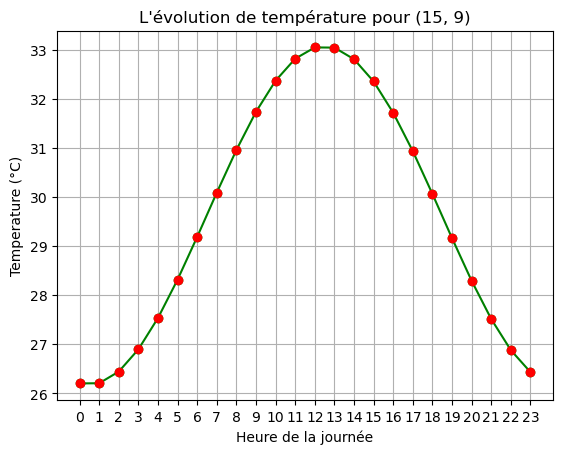

In [20]:
import numpy as np
import matplotlib.pyplot as plt


def calculate_temperature_evolution(initial_temperature, heat_amount_per_hour, heat_liberation, absorption_coefficient, reflection_coefficient):
    """
    Calculate the dynamic evolution of temperature for a single box throughout the day.
    
    Parameters:
    - initial_temperature (float): Initial temperature of the box.
    - heat_amount_per_hour (np.array): Array containing heat amount values for each hour of the day.
    - heat_liberation (np.array): Array containing heat liberation values for each hour of the day.
    - absorption_coefficient (float): Coefficient of absorption for the box.
    - reflection_coefficient (float): Coefficient of reflection for the box.
    
    Returns:
    - temperature_evolution (np.array): Array containing the temperature evolution for each hour of the day.
    """
    temperature_evolution = np.zeros(24)  # Initialize array to store temperature evolution
    
    # Calculate temperature evolution for each hour of the day
    for hour in range(24):
        temperature = initial_temperature + absorption_coefficient * heat_amount_per_hour[hour] - reflection_coefficient * heat_liberation[hour]
        temperature_evolution[hour] = temperature
    
    return temperature_evolution

# Define initial parameters


# Generate heat amount and heat liberation for a day
day_hours = np.arange(24)
heat_amount_per_hour = generate_heat_amount_per_hour()
heat_liberation = generate_heat_liberation(day_hours)

# Calculate absorption and reflection coefficients for each case
reflexion_coefficient = np.where(world_np == 0, np.random.uniform(0.1, 0.2), np.random.uniform(0.2, 0.4))
absorption_coefficient = np.where(world_np == 0, np.random.uniform(0.1, 0.3), np.random.uniform(0.4, 0.6))

# Define the coordinates of the box
coordinates = (15, 9)

# Calculate temperature evolution for the specified box
temperature_evolution = calculate_temperature_evolution(initial_temperature, heat_amount_per_hour, heat_liberation, absorption_coefficient[coordinates], reflexion_coefficient[coordinates])

# Plot temperature evolution
plt.plot(day_hours, temperature_evolution, marker='o', color='green')
plt.plot(day_hours, temperature_evolution, marker='o', linestyle='', color='red')

plt.title("L'évolution de température pour {}".format(coordinates))
plt.xlabel('Heure de la journée')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()


#### Conclusion Générale
L'intégration de la végétation dans notre modèle a montré son importance dans la régulation thermique urbaine. La végétation joue un rôle crucial dans la réduction de l'effet d'îlot de chaleur urbain en absorbant une partie du 
rayonnement solaire et en améliorant la convection et la circulation de l'air. 

Il est donc essentiel d'incorporer des espaces verts et de la végétation dans la planification urbaine pour atténuer les effets néfastes de la chaleur urbaine et améliorer le confort thermique des citoyens.


En conclusion, cette étude nous permet de mieux comprendre les mécanismes complexes qui influencent la température dans les villes et souligne l'importance de la végétation dans la régulation thermique urbaine. Des études supplémentaires peuvent être réalisées pour affiner le modèle et intégrer d'autres facteurs, tels que le relief et la densité de la ville, afin d'obtenir des résultats plus précis et fiables.

# La nouvelle partie 

Cette étude pourrait être étendue en incluant d'autres variables telles que l'humidité du sol, la densité de bâtiments, ou en explorant l'efficacité de différentes stratégies d'adaptation pour atténuer les effets de la chaleur dans la zone industrielle. De plus, des analyses de sensibilité pourraient être réalisées pour évaluer l'impact des variations de paramètres sur les résultats.